In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [18]:
print(rates.head())
print(rates.tail())
rates.info()

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [19]:
rates.rename( {"[US dollar ]" : "US_dollar" }, inplace = True, axis = 1) 
rates.rename( {"Period\\Unit:" : "Time" }, inplace = True, axis = 1) 
rates['Time']   = pd.to_datetime(rates['Time'])
rates.sort_values('Time' , inplace= True)
rates.reset_index(drop=True, inplace=True)

In [20]:

euro_to_dollar = rates[['Time','US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()
euro_to_dollar.drop(euro_to_dollar[euro_to_dollar['US_dollar'] == '-'].index, inplace =  True)
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [21]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


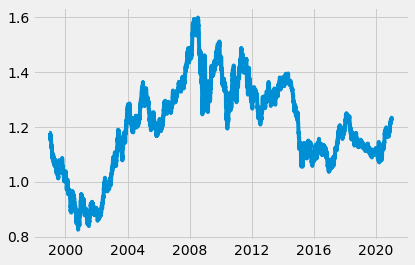

In [22]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

In [23]:
euro_to_dollar['rolling'] = euro_to_dollar['US_dollar'].rolling(30).mean()

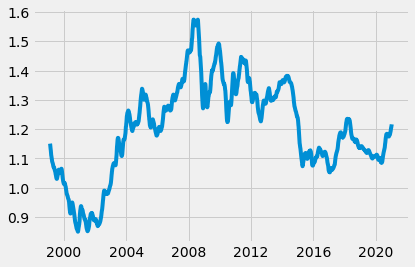

In [24]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling'])

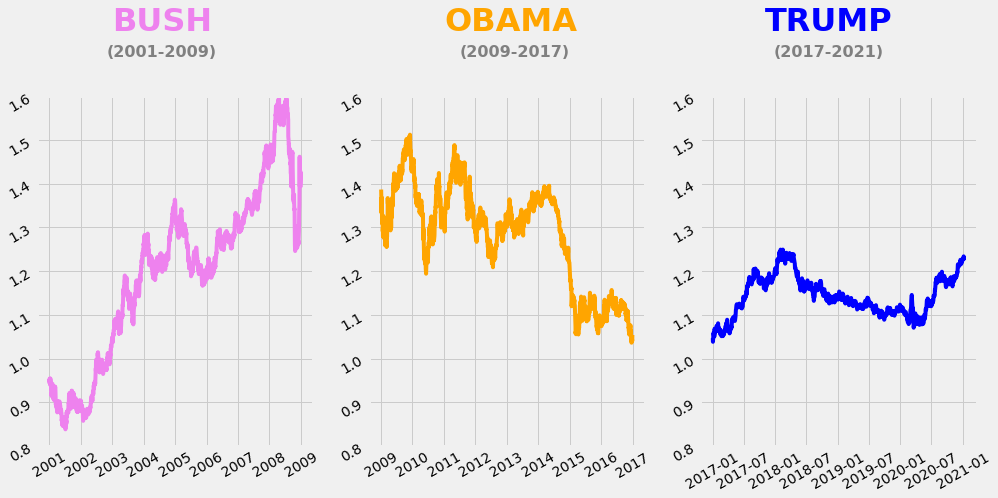

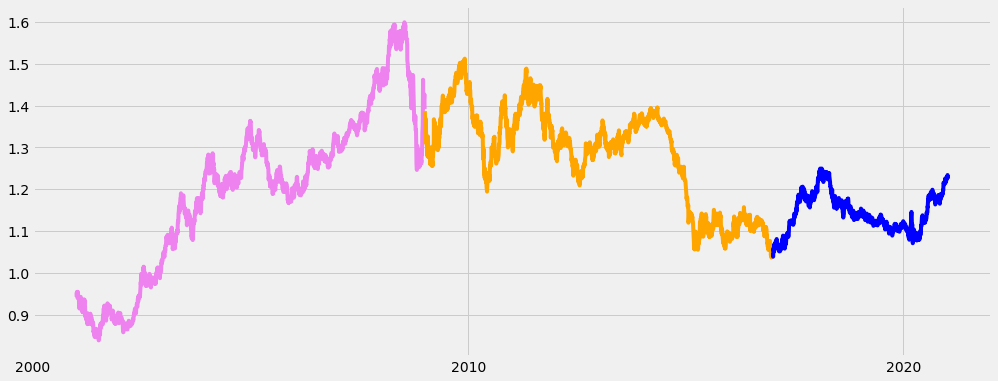

In [25]:

plt.style.use('fivethirtyeight')

fig, (ax1, ax2, ax3)  = plt.subplots(nrows = 1 , ncols = 3, figsize = (15,6))

axes = [ax1,ax2,ax3]

colors = ['violet', 'orange', 'blue' ]

year = 2001
for ax, c in zip(axes,colors):
    years = euro_to_dollar[euro_to_dollar['Time'].between(dt.datetime(year,1,1), dt.datetime(year+8,1,1))]
    ax.plot(years['Time'],years['US_dollar'] ,color = c)
    ax.grid(b = True)
    ax.set_ylim(0.8,1.6)
    ax.tick_params(rotation =  30)
    year += 8
#Name of the presidents
ax1.text(x = dt.datetime(2003,1,1) , y= 1.75 ,s = 'BUSH' , color = 'violet', weight = 'bold', size = 32)
ax2.text(x = dt.datetime(2011,1,1) , y= 1.75 ,s = 'OBAMA' , color = 'orange', weight = 'bold', size = 32)
ax3.text(x = dt.datetime(2017,11,1) , y= 1.75 ,s = 'TRUMP' , color = 'blue', weight = 'bold', size = 32)

#Years they served
ax1.text(x = dt.datetime(2002,11,1) , y= 1.69 ,s = '(2001-2009)' , color = 'grey', weight = 'bold',  size = 16)
ax2.text(x = dt.datetime(2011,7,1) , y= 1.69 ,s = '(2009-2017)' , color = 'grey', weight = 'bold',    size = 16)
ax3.text(x = dt.datetime(2017,12,25) , y= 1.69 ,s = '(2017-2021)' , color = 'grey', weight = 'bold',  size = 16)






plt.show()
plt.figure(figsize=(15.3,6))
#plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'], )
year = 2001

for c in colors:
    years = euro_to_dollar[euro_to_dollar['Time'].between(dt.datetime(year,1,1), dt.datetime(year+8,1,1))]
    plt.plot(years['Time'],years['US_dollar'] ,color = c)
    #ax.tick_params(rotation =  30)
    year += 8
plt.xticks([dt.datetime(2000,1,1),dt.datetime(2010,1,1),dt.datetime(2020,1,1)] ,['2000', '2010', '2020'] )
plt.show()

